- Gerardo Peña Pérez
- Carlos Alberto 
- Kevin Joan 
- Wenguang Hu

In [78]:
import numpy as np
from gensim.models import KeyedVectors
from gensim.test.utils import get_tmpfile, datapath
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from gensim.models import word2vec


glove_file = datapath(r'C:\Users\gerar\OneDrive\Documents\7mo semestre\glove_embeddings\glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)


C:\Users\gerar\AppData\Local\Temp\ipykernel_18252\1504802040.py:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [3]:

with open(glove_file) as f:
    for i, line in enumerate(f):
        print(line)
        if i>=5:break

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [5]:
model['hello']

array([ 0.26688  ,  0.39632  ,  0.6169   , -0.77451  , -0.1039   ,
        0.26697  ,  0.2788   ,  0.30992  ,  0.0054685, -0.085256 ,
        0.73602  , -0.098432 ,  0.5479   , -0.030305 ,  0.33479  ,
        0.14094  , -0.0070003,  0.32569  ,  0.22902  ,  0.46557  ,
       -0.19531  ,  0.37491  , -0.7139   , -0.51775  ,  0.77039  ,
        1.0881   , -0.66011  , -0.16234  ,  0.9119   ,  0.21046  ,
        0.047494 ,  1.0019   ,  1.1133   ,  0.70094  , -0.08696  ,
        0.47571  ,  0.1636   , -0.44469  ,  0.4469   , -0.93817  ,
        0.013101 ,  0.085964 , -0.67456  ,  0.49662  , -0.037827 ,
       -0.11038  , -0.28612  ,  0.074606 , -0.31527  , -0.093774 ,
       -0.57069  ,  0.66865  ,  0.45307  , -0.34154  , -0.7166   ,
       -0.75273  ,  0.075212 ,  0.57903  , -0.1191   , -0.11379  ,
       -0.10026  ,  0.71341  , -1.1574   , -0.74026  ,  0.40452  ,
        0.18023  ,  0.21449  ,  0.37638  ,  0.11239  , -0.53639  ,
       -0.025092 ,  0.31886  , -0.25013  , -0.63283  , -0.0118

In [6]:
import numpy as np
from numpy.linalg import norm

def similarity(wordA, wordB):
    A = model[wordA]
    B = model[wordB]
    
    cosine = np.dot(A,B)/(norm(A)*norm(B))
    print("Similarity:", cosine)

In [60]:
def analogy(wordA, wordB, wordC): # king is to man like queen is to 'woman'
    A = model[wordA]
    B = model[wordB]
    C = model[wordC]

    diff = A - B
    vec = C - diff
    vec = model.similar_by_vector(vec)
    analog = vec[0],vec[1]
    analog = analog[0][0]
    string = str(wordA) + ' is to ' + str(wordB) + ' like ' + str(wordC) + ' is to ' + str(analog)
    return string

In [61]:
similarity("high","low")

Similarity: 0.8233938


In [62]:
vec = analogy("queen","woman","king")
print(vec)

queen is to woman like king is to man


In [63]:
vec = analogy('man','dad','woman')
print(vec)

man is to dad like woman is to mom


In [64]:
vec = analogy('mexican','mexico','argentine')
print(vec)

mexican is to mexico like argentine is to argentina


In [18]:
model.similar_by_vector(model['good'])

[('good', 0.9999999403953552),
 ('better', 0.893191397190094),
 ('sure', 0.8314563035964966),
 ('really', 0.8297762274742126),
 ('kind', 0.8288268446922302),
 ('very', 0.8260800242424011),
 ('we', 0.8234355449676514),
 ('way', 0.8215398192405701),
 ('think', 0.8205099105834961),
 ('thing', 0.8171301484107971)]

In [66]:
#model.similarity(vec)
model.similar_by_vector(vec)

In [66]:
len(model['hello'])

100

In [52]:
model.most_similar(vec)

[('king', 0.8402630090713501),
 ('queen', 0.7522500157356262),
 ('vi', 0.6550734043121338),
 ('prince', 0.6374996304512024),
 ('vajiravudh', 0.6154789924621582),
 ('monarch', 0.6121526956558228),
 ('coronation', 0.6101997494697571),
 ('throne', 0.6037005186080933),
 ('royal', 0.5979631543159485),
 ('majesty', 0.5930461883544922)]

In [69]:
x = model.vectors
pca = PCA(n_components= 2)
pca.fit(x)

PCA(n_components=2)

In [76]:
components = pca.fit_transform(x)

400000

<AxesSubplot:xlabel='X', ylabel='Y'>

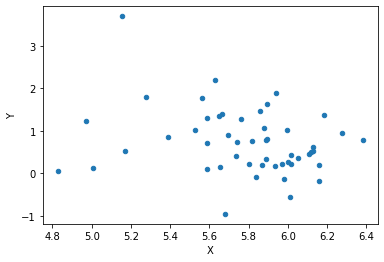

In [85]:
sample = components[:50]
columns = ['X','Y']
sample = pd.DataFrame(sample, columns = columns)

sample.plot.scatter('X', 'Y')


AttributeError: 'KeyedVectors' object has no attribute 'keys'

In [75]:
import matplotlib as plt

In [ ]:
plt.plot()